In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Домашнее задание к лекции " Корреляция и регрессия"

Счастье у каждого своё, но когда данных достаточно много, можно попробовать поискать закономерности :).
Предлагаем этим и заняться.

Для работы используйте датасет “happines_corruption.csv”, приложенный к материалам занятия. Описание столбцов:

Country - Name of the country.

happiness_score - Average of responses to the primary life evaluation question from the Gallup World Poll (GWP). 0-10

gdp_per_capita - The extent to which GDP contributes to the calculation of the Happiness Score.

family - The extent to which Family contributes to the calculation of the Happiness Score

health - The extent to which Life expectancy contributed to the calculation of the Happiness Score

freedom - The extent to which Freedom contributed to the calculation of the Happiness Score

generosity - A numerical value calculated based on poll participants’ perceptions of generosity in their country.

government_trust - The extent to which Perception of Corruption contributes to Happiness Score.

dystopia_residual - A score based on a hypothetical comparison to the world’s saddest country.

continent - Region of the country.


In [2]:
df = pd.read_csv('C:\\Users\\ilyak\\Desktop\\Python\\Python_projects\\Материалы\\happines_corruption.csv')
df.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


Задание 1

Базово изучите датасет (достаточно методов info() и describe()).
Выдвиньте пару гипотез, например, “Верно ли, что чем выше ВВП, тем выше и уровень счастья?” или “Есть ли взаимосвязь между уровнем доверия правительству и уровнем счастья?”. Постарайтесь подтвердить или опровергнуть их визуально и с помощью расчётов.
Желательно, но не обязательно:
Составьте корреляционную матрицу всех числовых признаков набора данных и визуализируйте её с помощью тепловой карты.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


In [4]:
df.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


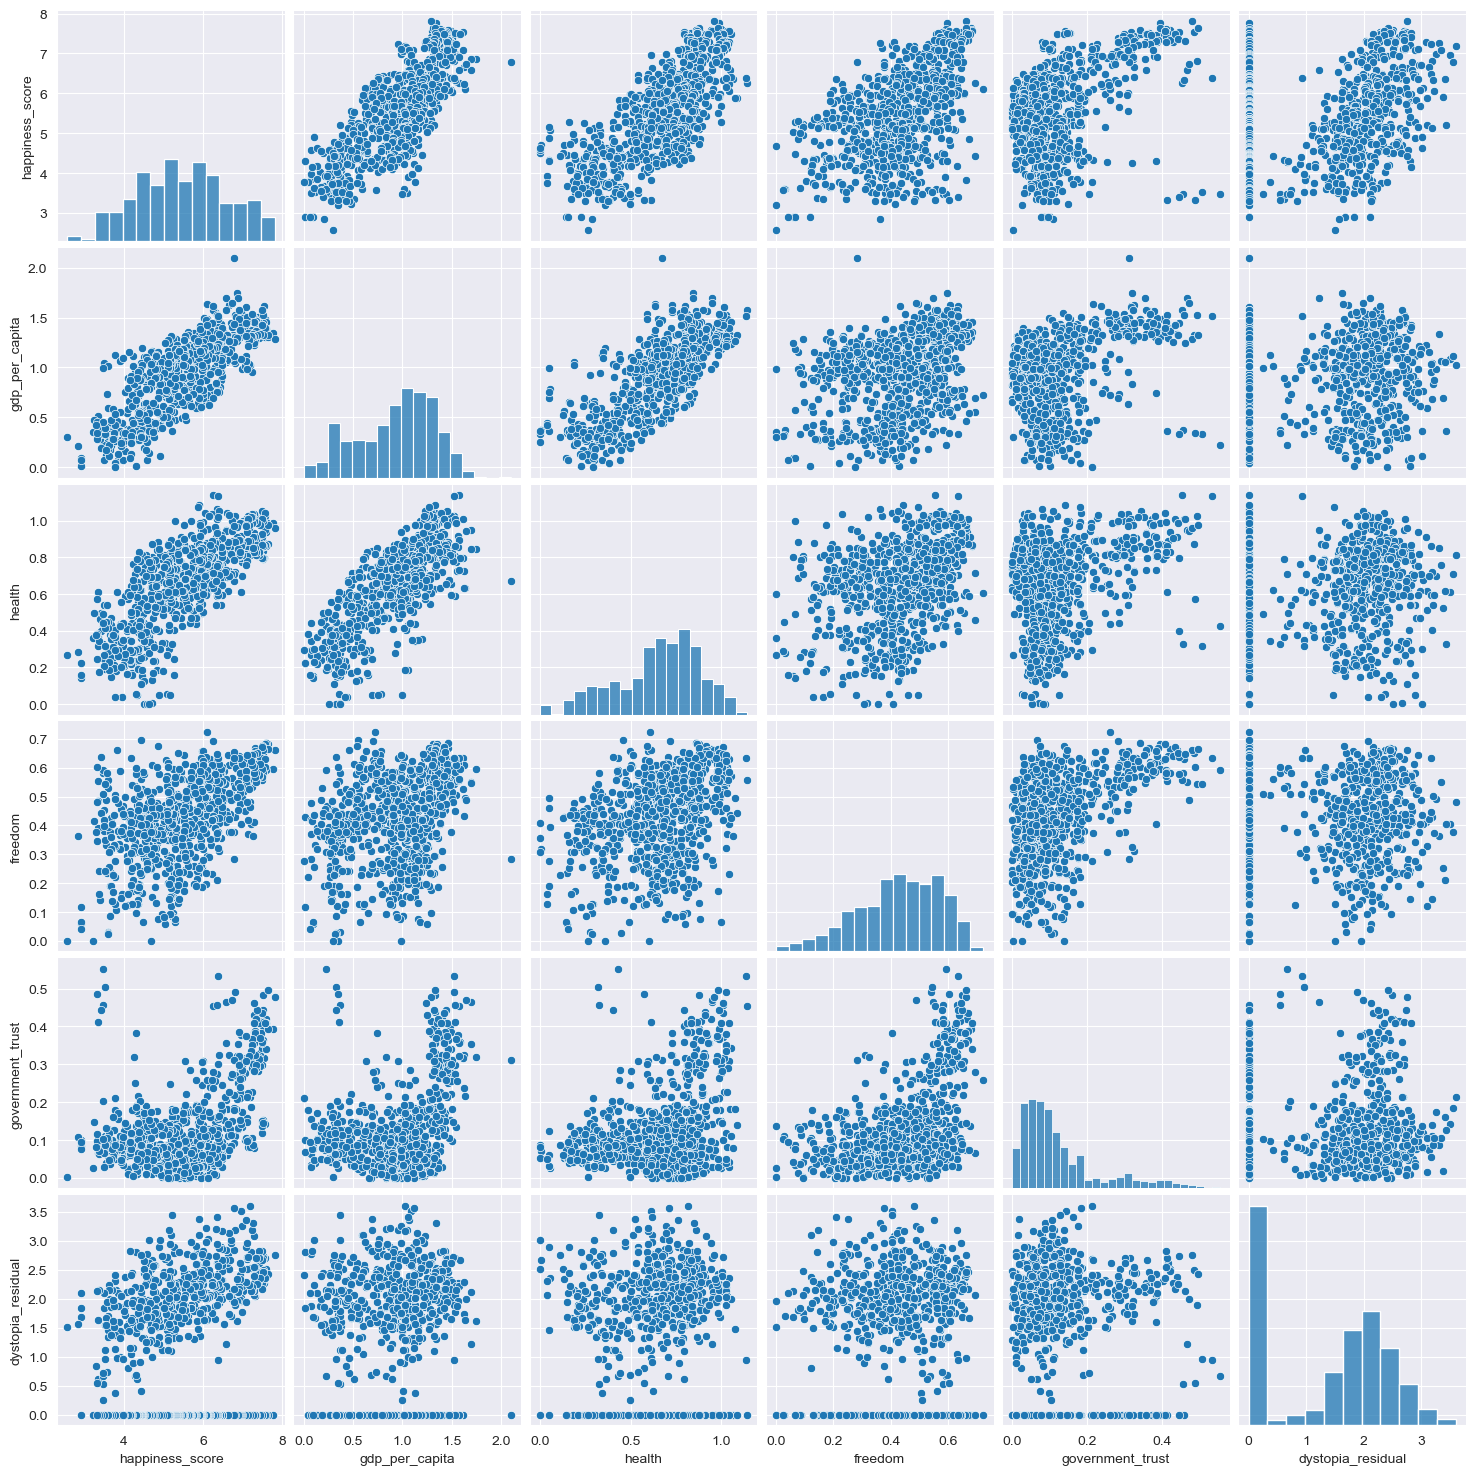

In [7]:
sns.pairplot(df[['happiness_score', 'gdp_per_capita', 'health', 'freedom', 'government_trust', 'dystopia_residual']])

Из графика мы можем предположить две гипотезы: 

1. Чем выше ВВП, тем выше уровень счастья

2. Чем люди счастливее, тем они более здоровые 

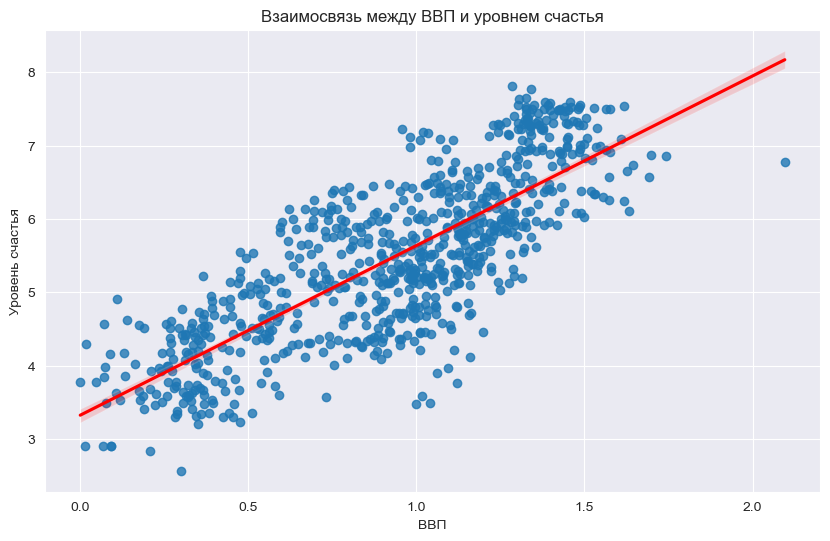

In [13]:
#Чем выше ВВП, тем выше уровень счастья

plt.figure(figsize=(10,6),dpi=100)

sns.regplot(x='gdp_per_capita',y='happiness_score',data=df,
            line_kws={'color':'red'},
            ci = 90, truncate = True
            )
plt.title('Взаимосвязь между ВВП и уровнем счастья')
plt.xlabel('ВВП')
plt.ylabel('Уровень счастья')
plt.show()

Как мы видим есть линейная зависимость между значениями ВВП и уровнем счастья населения 

In [32]:
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(df['gdp_per_capita'], df['happiness_score'])

print(f"Коэффициент корреляции: {corr_coef}")
print(f"p-значение: {p_value}")

if p_value < 0.05:
    print("Гипотеза о корреляции уровня ВВП и уровня счастья подтверждена")
else:
    print("Гипотеза о корреляции уровня ВВП и уровня счастья не подтверждена")

# Проверка зависимости
from statsmodels.formula.api import ols

model = ols('df["happiness_score"] ~ df["gdp_per_capita"]', data=df).fit()

print(f"p-значение для зависимости: {model.pvalues['df["gdp_per_capita"]']}")

if model.pvalues['df["gdp_per_capita"]'] < 0.05:
    print("Гипотеза о зависимости уровня ВВП и уровня счастья подтверждена")
else:
    print("Гипотеза о зависимости уровня ВВП и уровня счастья не подтверждена")

Коэффициент корреляции: 0.7932671770333461
p-значение: 2.13672566628236e-172
Гипотеза о корреляции уровня ВВП и уровня счастья подтверждена
p-значение для зависимости: 2.1367256662809153e-172
Гипотеза о зависимости уровня ВВП и уровня счастья подтверждена


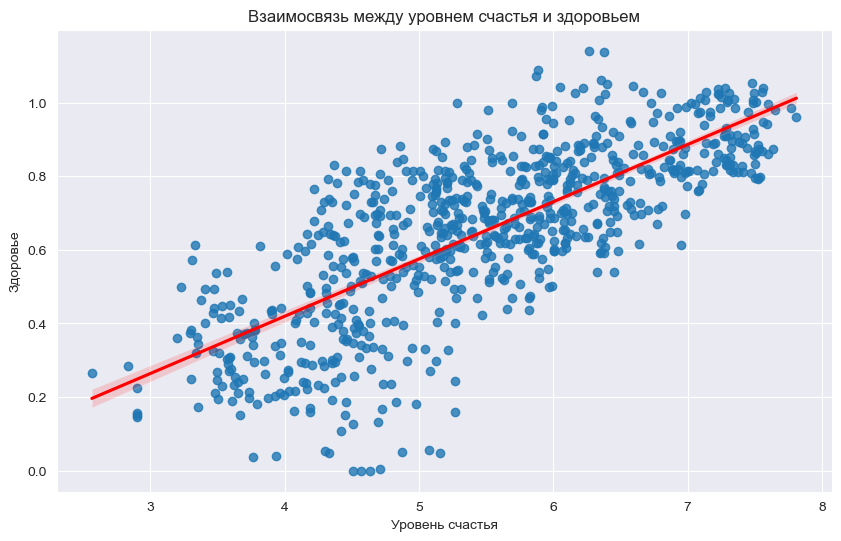

In [33]:
#Чем люди счастливее, тем они более здоровые

plt.figure(figsize=(10,6),dpi=100)

sns.regplot(x='happiness_score',y='health',data=df,
            line_kws={'color':'red'},
            ci = 90, truncate = True
            )
plt.title('Взаимосвязь между уровнем счастья и здоровьем')
plt.xlabel('Уровень счастья')
plt.ylabel('Здоровье')
plt.show()

Имеется линейная зависимость между уровнем счастья и здоровьем 

In [34]:
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(df['happiness_score'], df['health'])

print(f"Коэффициент корреляции: {corr_coef}")
print(f"p-значение: {p_value}")

if p_value < 0.05:
    print("Гипотеза о корреляции уровня счастья и здоровья подтверждена")
else:
    print("Гипотеза о корреляции уровня счастья и здоровья не подтверждена")
    
from statsmodels.formula.api import ols

model = ols('df["health"] ~ df["happiness_score"]', data=df).fit()

print(f"p-значение для зависимости: {model.pvalues['df["happiness_score"]']}")

if model.pvalues['df["happiness_score"]'] < 0.05:
    print("Гипотеза о зависимости уровня счастья и здоровья подтверждена")
else:
    print("Гипотеза о зависимости уровня счастья и здоровья не подтверждена")

Коэффициент корреляции: 0.7535343457737047
p-значение: 4.6279631908489445e-146
Гипотеза о корреляции уровня счастья и здоровья подтверждена
p-значение для зависимости: 4.627963190848227e-146
Гипотеза о зависимости уровня счастья и здоровья подтверждена


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   happiness_score    792 non-null    float64
 1   gdp_per_capita     792 non-null    float64
 2   family             792 non-null    float64
 3   health             792 non-null    float64
 4   freedom            792 non-null    float64
 5   generosity         792 non-null    float64
 6   government_trust   792 non-null    float64
 7   dystopia_residual  792 non-null    float64
 8   continent          792 non-null    object 
 9   Year               792 non-null    int64  
 10  social_support     792 non-null    float64
 11  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 74.4+ KB


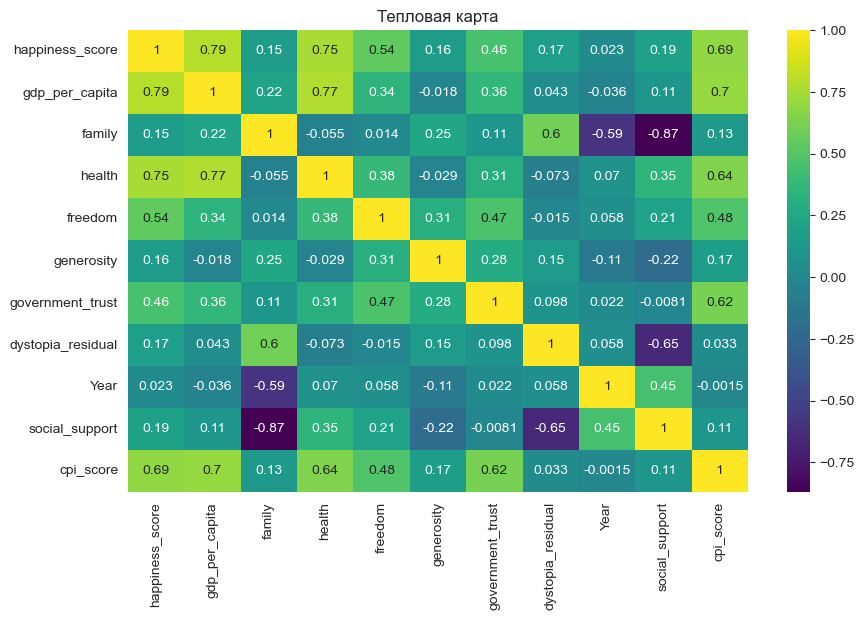

In [48]:

plt.figure(figsize=(10,6),dpi=100)

sns.heatmap(df.corr(), annot = True, cmap = 'viridis')
plt.title('Тепловая карта')
plt.show()

In [46]:
df.corr()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
happiness_score,1.000000,0.793267,0.154946,0.753534,0.544284,0.155419,0.455477,0.174161,0.023495,0.192633,0.693001
gdp_per_capita,0.793267,1.000000,0.218191,0.774980,0.340260,-0.018355,0.359068,0.042710,-0.035782,0.111701,0.704483
family,0.154946,0.218191,1.000000,-0.054683,0.013833,0.245437,0.114767,0.600243,-0.588630,-0.869885,0.132031
health,0.753534,0.774980,-0.054683,1.000000,0.381869,-0.028882,0.312741,-0.073157,0.070172,0.347438,0.644478
freedom,0.544284,0.340260,0.013833,0.381869,1.000000,0.306240,0.473980,-0.015270,0.058195,0.208709,0.482923
generosity,0.155419,-0.018355,0.245437,-0.028882,0.306240,1.000000,0.280039,0.147750,-0.109797,-0.215131,0.165972
government_trust,0.455477,0.359068,0.114767,0.312741,0.473980,0.280039,1.000000,0.098366,0.021781,-0.008136,0.620089
dystopia_residual,0.174161,0.042710,0.600243,-0.073157,-0.015270,0.147750,0.098366,1.000000,0.057519,-0.654570,0.032630
Year,0.023495,-0.035782,-0.588630,0.070172,0.058195,-0.109797,0.021781,0.057519,1.000000,0.448616,-0.001460
social_support,0.192633,0.111701,-0.869885,0.347438,0.208709,-0.215131,-0.008136,-0.654570,0.448616,1.000000,0.109077


Задание 2

Продолжаем изучать цены на газ в Южной Корее. Файл с данными “gas_sales_data.csv”.

В этом задании нужно окончательно ответить на вопрос:

Есть ли связь между среднемесячной температурой и потреблением газа в Южной Корее?

In [49]:
df = pd.read_csv('C:\\Users\\ilyak\\Desktop\\Python\\Python_projects\\Материалы\\gas_sales_data.csv')
df.head()


,Year,Month,Temperature,Gangwondo,Seoul,Gyeonggido,Incheon,Gyeongsangnamdo,Gyeongsangbukdo,Gwangju,...,Daejeon,Busan,Sejong,Ulsan,Jeollanamdo,Jeollabukdo,Jeju,Chungcheongnamdo,Chungcheongbukdo,Sum
0,2000,1,-1.20,16219,662424,363014,139454,42129,55362,39465,...,52992,85787,0,69241,22508,34507,0,20158,27838,1717175
1,2000,2,-0.99,16280,689177,375937,145834,42604,52863,40674,...,53950,87282,0,70910,22310,33784,0,23492,27175,1766341
2,2000,3,6.64,14105,566528,323145,121324,35990,47282,34610,...,41898,74476,0,63627,18033,29315,0,21156,22904,1490537
3,2000,4,12.11,10364,396231,237437,91421,28698,40393,25898,...,28618,58316,0,47106,15920,19783,0,17447,16818,1096964
4,2000,5,17.59,6843,262940,169495,67239,21073,35083,18426,...,17503,45915,0,43749,13808,14375,0,14508,12299,790248


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              252 non-null    int64  
 1   Month             252 non-null    int64  
 2   Temperature       252 non-null    float64
 3   Gangwondo         252 non-null    int64  
 4   Seoul             252 non-null    int64  
 5   Gyeonggido        252 non-null    int64  
 6   Incheon           252 non-null    int64  
 7   Gyeongsangnamdo   252 non-null    int64  
 8   Gyeongsangbukdo   252 non-null    int64  
 9   Gwangju           252 non-null    int64  
 10  Daegu             252 non-null    int64  
 11  Daejeon           252 non-null    int64  
 12  Busan             252 non-null    int64  
 13  Sejong            252 non-null    int64  
 14  Ulsan             252 non-null    int64  
 15  Jeollanamdo       252 non-null    int64  
 16  Jeollabukdo       252 non-null    int64  
 1

In [51]:
sum_and_temperature = df[['Temperature', 'Sum']]
sum_and_temperature

,Temperature,Sum
0,-1.20,1717175
1,-0.99,1766341
2,6.64,1490537
3,12.11,1096964
4,17.59,790248
...,...,...
247,27.00,1142099
248,21.40,1160655
249,14.90,1471242
250,9.00,2116835


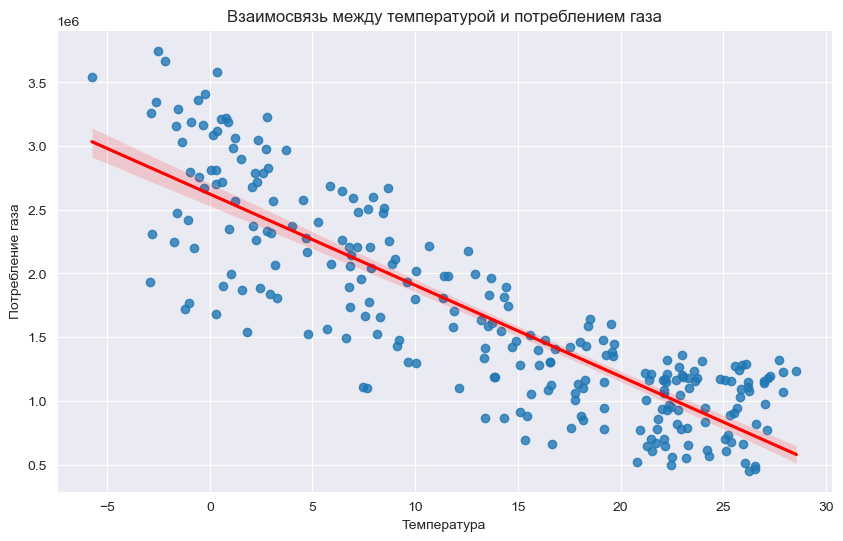

In [52]:

plt.figure(figsize=(10,6),dpi=100)

sns.regplot(x='Temperature',y='Sum',data=sum_and_temperature,
            line_kws={'color':'red'},
            ci = 90, truncate = True
            )
plt.title('Взаимосвязь между температурой и потреблением газа')
plt.xlabel('Температура')
plt.ylabel('Потребление газа')
plt.show()

In [54]:
sum_and_temperature.corr()

,Temperature,Sum
Temperature,1.000000,-0.857653
Sum,-0.857653,1.000000


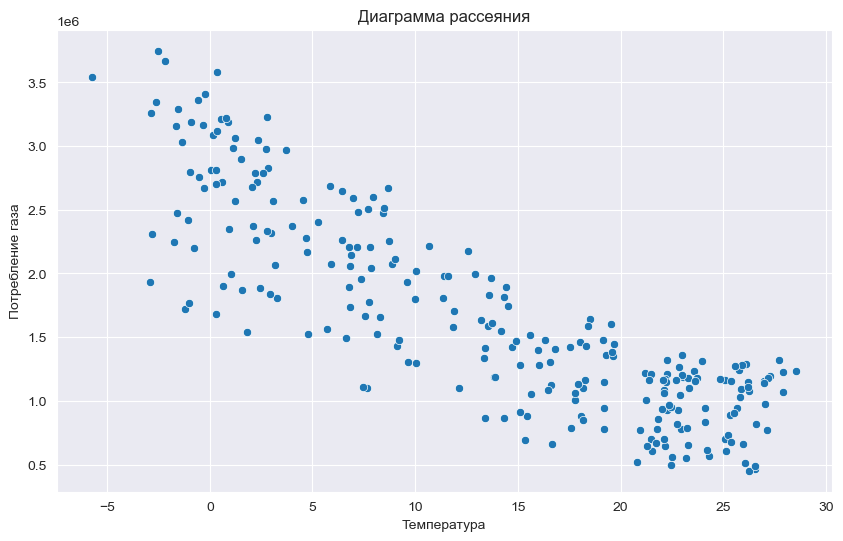

In [119]:
plt.figure(figsize=(10,6),dpi=100)
sns.scatterplot(x = 'Temperature', y = 'Sum', data = sum_and_temperature)
plt.title('Диаграмма рассеяния')
plt.xlabel('Температура')
plt.ylabel('Потребление газа')
plt.show()


In [114]:
X = sum_and_temperature.drop('Sum', axis = 1)
y = sum_and_temperature['Sum']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

base_elastic_net_model = ElasticNet()

param_grid = {'alpha':[ 0.0001, 0.0005, 0.001,0.005, 
                       0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09, 0.1],
              'l1_ratio':[0.001,0.005, 0.01, 
                          0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
                          0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
                          0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,
                          0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,
                          0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,
                          0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,  0.54,
                          0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,  0.63,
                          0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,  0.72,
                          0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,  0.81,
                          0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,  0.9 ,
                          0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,  0.99,
                          1.0]}
                                      

grid_model = GridSearchCV(estimator= base_elastic_net_model, param_grid = param_grid,
                          scoring = 'neg_root_mean_squared_error', cv = 10, verbose = 2)
grid_model.fit(X_train, y_train)
grid_model.best_params_

Fitting 10 folds for each of 1428 candidates, totalling 14280 fits
[CV] END .......................alpha=0.0001, l1_ratio=0.001; total time=   0.0s
[CV] END .......................alpha=0.0001, l1_ratio=0.001; total time=   0.0s
[CV] END .......................alpha=0.0001, l1_ratio=0.001; total time=   0.0s
[CV] END .......................alpha=0.0001, l1_ratio=0.001; total time=   0.0s
[CV] END .......................alpha=0.0001, l1_ratio=0.001; total time=   0.0s
[CV] END .......................alpha=0.0001, l1_ratio=0.001; total time=   0.0s
[CV] END .......................alpha=0.0001, l1_ratio=0.001; total time=   0.0s
[CV] END .......................alpha=0.0001, l1_ratio=0.001; total time=   0.0s
[CV] END .......................alpha=0.0001, l1_ratio=0.001; total time=   0.0s
[CV] END .......................alpha=0.0001, l1_ratio=0.001; total time=   0.0s
[CV] END .......................alpha=0.0001, l1_ratio=0.005; total time=   0.0s
[CV] END .......................alpha=0.00

{'alpha': 0.0001, 'l1_ratio': 1.0}

In [115]:
from sklearn.metrics import r2_score

y_pred = grid_model.predict(X_test)

r2_score(y_test, y_pred)

0.7498386091552288

In [116]:
grid_model.best_score_

-413625.2371109473

In [117]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {RMSE}, MAE: {MAE}')

RMSE: 402612.9384022583, MAE: 324707.3061281965


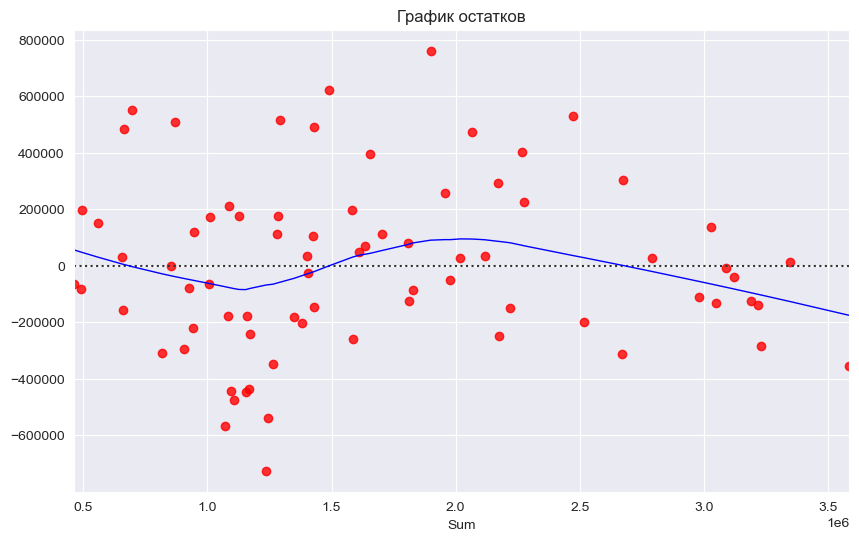

In [118]:
plt.figure(figsize=(10,6),dpi=100)
sns.residplot(x = y_test, y = y_pred, lowess = True, color = 'red',
              line_kws={'color':'blue', 'lw':1})
plt.title('График остатков')
plt.show()